# Clustering - Gaussian Mixture Model 1

### Import libraries

In [1]:
import pandas as pd                       
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Load data

In [2]:
df = pd.read_csv("data/height_weight_distribution.csv")
df.shape

(500, 2)

### Examine data

In [3]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


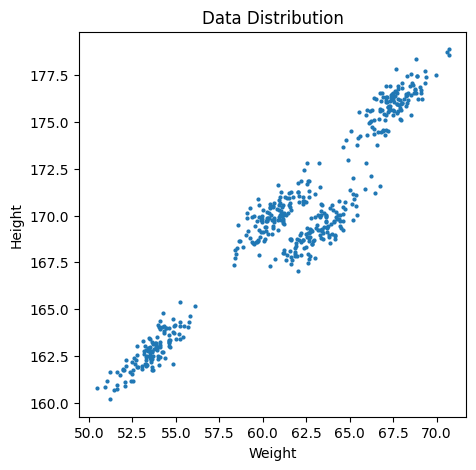

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(df["Weight"], df["Height"], s=4)                       
plt.xlabel('Weight')                       
plt.ylabel('Height')                       
plt.title('Data Distribution')                       
plt.show()

### Train K-Means model

In [5]:
# Instantiate and fit KMeans model
KM = KMeans(n_clusters=4, n_init=10, random_state=42)
KM.fit(df)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [6]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


### Test model

In [7]:
pred = KM.predict(df)

In [8]:
df2 = df.copy(deep=True)
df2['Cluster'] = pred
df2.shape

(500, 3)

In [9]:
df2.head()

,Weight,Height,Cluster
0,67.062924,176.086355,1
1,68.804094,178.388669,1
2,60.930863,170.284496,0
3,59.733843,168.691992,0
4,65.431230,173.763679,1


### Visualize results

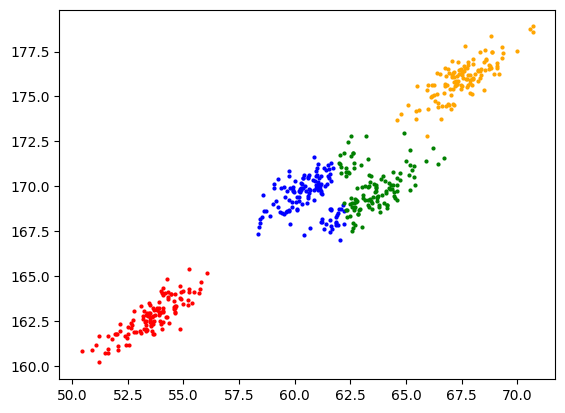

In [10]:
# Plot results                       
color=['blue','orange','red','green']                       
for k in range(0,4):                           
    tmp = df2[df2["Cluster"]==k]                               
    plt.scatter(tmp["Weight"], tmp["Height"], c=color[k], s=4)
plt.show()

The KMeans model failed to identify the right clusters.  
Look closely at the clusters in the center — KMeans tried to build a circular cluster even though the data distribution is elliptical.

### Train Gaussian Mixture Model

In [11]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [12]:
# Instantiate and fit Gaussian Mixture Model
GMM = GaussianMixture(n_components=4, random_state=42)
GMM.fit(df)

GaussianMixture(n_components=4, random_state=42)

### Test model

In [13]:
pred2 = GMM.predict(df)

In [14]:
df3 = df.copy(deep=True)
df3['Cluster'] = pred2
df3.shape

(500, 3)

In [15]:
df3.head()

,Weight,Height,Cluster
0,67.062924,176.086355,0
1,68.804094,178.388669,0
2,60.930863,170.284496,3
3,59.733843,168.691992,3
4,65.431230,173.763679,0


### Visualize updated results

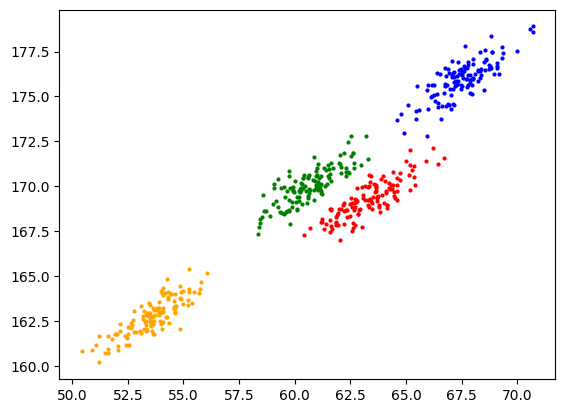

In [16]:
# Plot results                       
#color=['blue','orange','red','green']                       
for k in range(0,4):                           
    tmp = df3[df3["Cluster"]==k]                               
    plt.scatter(tmp["Weight"], tmp["Height"], c=color[k], s=4)
plt.show()

The clusters above look more accurate